# Feature Engineering & PreProcessing

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import os
import json


import librosa
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler,RobustScaler,MinMaxScaler

### Data Imports

In [55]:
with open('pickles/df_model.pkl', 'rb') as f:
    df_model = pickle.load(f)

In [ ]:
with open('pickles/df_model_nn.pkl', 'rb') as f:
    df_model_nn = pickle.load(f)

In [4]:
df_metrics = df_model

In [5]:
df_metrics.columns

Index(['filename', 'mfccs', 'spectral_centroids', 'spectral_bandwidth',
       'zero_crossing_rate', 'chroma', 'mel_spec', 'spectral_flatness',
       'spectral_flux', 'modelId'],
      dtype='object')

### Cepstral Mean & Variance Normalization

In [6]:
df_metrics.shape

(131903, 10)

In [7]:
def cmvn(row):
    row_mean = np.nanmean(row)
    row_var = np.nanvar(row)
    row_norm = (row - row_mean) / np.sqrt(row_var + 1e-10)
    return row_norm


#### Base Model

In [8]:
columns_to_transform = [col for col in df_metrics.columns if col not in ['modelId', 'filename']]
df_metrics[columns_to_transform] = df_metrics[columns_to_transform].applymap(cmvn)

In [9]:
df_metrics.head(3)

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-1.0316685, 0.66639185, 1.2739277, 2.0394552,...","[-0.55482626, -1.8042269, -3.0069544, -2.96031...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-1.1444644, 5.8929696, 0.016908754, 1.1057886...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-0.58025146, 0.31448054, 1.5159235, 1.7131476...","[-0.13223125, -2.0638447, -2.634488, -3.105178...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-0.68436664, -0.5787139, -0.44470647, 0.60583...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
2,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[2.1149406, 1.0284079, 1.029396, 0.962787, 0.5...","[0.38152722, -1.5000703, -1.553359, -1.4840605...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[3.9415672, 4.3234744, 3.277251, 2.6679187, 3....","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0


#### Neural Net

In [10]:
columns_to_transform = [col for col in df_model_nn.columns if col not in ['modelId', 'filename']]
df_model_nn[columns_to_transform] = df_model_nn[columns_to_transform].applymap(cmvn)

In [11]:
df_model_nn.head(3)

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.7061255, 3.9912548, 4.093269, 4.221812, 4....","[-0.55482626, -1.8042269, -3.0069544, -2.96031...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[[-0.44410256, -0.25054598, -0.41216034, -0.38...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.7785208, 3.9455507, 4.169838, 4.206656, 4....","[-0.13223125, -2.0638447, -2.634488, -3.105178...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[[-0.43412775, -0.43064317, -0.4262234, -0.391...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
2,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[[4.5581512, 4.2125206, 4.212835, 4.191646, 4....","[0.38152722, -1.5000703, -1.553359, -1.4840605...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[[-0.05986426, -0.0330719, -0.10646879, -0.149...","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0


### Metric Length Reduction

In [12]:
df_metrics['mfccs'][0]

array([-1.0316685 ,  0.66639185,  1.2739277 ,  2.0394552 ,  1.180634  ,
        0.46984994,  0.00546511, -0.930217  , -0.8026928 , -0.98201334,
       -1.087228  , -0.6428844 , -0.15903977], dtype=float32)

In [13]:
df_metrics['spectral_centroids'] = [i[:5] for i in df_metrics['spectral_centroids']]

In [14]:
df_metrics['spectral_bandwidth'] = [i[:5] for i in df_metrics['spectral_bandwidth']]

In [15]:
df_metrics['zero_crossing_rate'] = [i[:10] for i in df_metrics['zero_crossing_rate']]

In [16]:
df_metrics['chroma'] = [i[:10] for i in df_metrics['chroma']]

In [17]:
df_metrics['mel_spec'] = [i[:10] for i in df_metrics['mel_spec']]

In [18]:
df_metrics['spectral_flux'] = [i[:10] for i in df_metrics['spectral_flux']]

In [19]:
df_metrics.head(2)

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-1.0316685, 0.66639185, 1.2739277, 2.0394552,...","[-0.55482626, -1.8042269, -3.0069544, -2.96031...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-1.1444644, 5.8929696, 0.016908754, 1.1057886...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-0.58025146, 0.31448054, 1.5159235, 1.7131476...","[-0.13223125, -2.0638447, -2.634488, -3.105178...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-0.68436664, -0.5787139, -0.44470647, 0.60583...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0


## Unpacking Metric Columns

In the Librosa call within the last two notebooks, we created dataframes that contains several columns, each with a list of values within each row. We'll need to unpack these values into their own features to allow a model to iterate over each value.

In [20]:
def unpack_lists(df, column):
    max_cols = max(df[column].apply(len))
    col_names = [f"{column}_{i}" for i in range(max_cols)]
    unpacked = pd.DataFrame(df[column].to_list(), columns=col_names)
    df = pd.concat([df, unpacked], axis=1)

    return df

In [21]:
df_metrics = unpack_lists(df_metrics, 'mfccs')

In [22]:
df_metrics = unpack_lists(df_metrics, 'chroma')

In [23]:
df_metrics = unpack_lists(df_metrics, 'spectral_centroids')

In [24]:
df_metrics = unpack_lists(df_metrics, 'spectral_bandwidth')

In [25]:
df_metrics = unpack_lists(df_metrics, 'spectral_flux')

In [26]:
df_metrics = unpack_lists(df_metrics, 'mel_spec')

### Mean Metrics

To reduce the horizontal shape of the df, we'll take the mean value of each metric and report that value. This process may be iterative because I'm not certain that the model will be effective given simply the mean value of each metric.

In [27]:
df_metrics.columns

Index(['filename', 'mfccs', 'spectral_centroids', 'spectral_bandwidth',
       'zero_crossing_rate', 'chroma', 'mel_spec', 'spectral_flatness',
       'spectral_flux', 'modelId', 'mfccs_0', 'mfccs_1', 'mfccs_2', 'mfccs_3',
       'mfccs_4', 'mfccs_5', 'mfccs_6', 'mfccs_7', 'mfccs_8', 'mfccs_9',
       'mfccs_10', 'mfccs_11', 'mfccs_12', 'chroma_0', 'chroma_1', 'chroma_2',
       'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8',
       'chroma_9', 'spectral_centroids_0', 'spectral_centroids_1',
       'spectral_centroids_2', 'spectral_centroids_3', 'spectral_centroids_4',
       'spectral_bandwidth_0', 'spectral_bandwidth_1', 'spectral_bandwidth_2',
       'spectral_bandwidth_3', 'spectral_bandwidth_4', 'spectral_flux_0',
       'spectral_flux_1', 'spectral_flux_2', 'spectral_flux_3',
       'spectral_flux_4', 'spectral_flux_5', 'spectral_flux_6',
       'spectral_flux_7', 'spectral_flux_8', 'spectral_flux_9', 'mel_spec_0',
       'mel_spec_1', 'mel_spec_2', 'mel_s

In [28]:
def mean_metrics(df, column):
    new_column = column + '_mean'
    return df[column].apply(lambda x: np.mean(x)).rename(new_column)

In [29]:
mfcc_mean = mean_metrics(df_metrics, 'mfccs')
spectral_centroids_mean = mean_metrics(df_metrics, 'spectral_centroids')
spectral_bandwidth_mean = mean_metrics(df_metrics, 'spectral_bandwidth')
zero_crossing_rate_mean = mean_metrics(df_metrics, 'zero_crossing_rate')
chroma_cens_mean = mean_metrics(df_metrics, 'chroma')
spectral_flux_mean = mean_metrics(df_metrics, 'spectral_flux')
mel_spec_mean = mean_metrics(df_metrics, 'mel_spec')

In [30]:
df_metrics = pd.concat([df_metrics, mfcc_mean, spectral_centroids_mean, spectral_bandwidth_mean, zero_crossing_rate_mean, chroma_cens_mean,spectral_flux_mean,mel_spec_mean], axis=1)

In [31]:
df_metrics

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId,...,mel_spec_7,mel_spec_8,mel_spec_9,mfccs_mean,spectral_centroids_mean,spectral_bandwidth_mean,zero_crossing_rate_mean,chroma_mean,spectral_flux_mean,mel_spec_mean
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-1.0316685, 0.66639185, 1.2739277, 2.0394552,...","[-0.55482626, -1.8042269, -3.0069544, -2.96031...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-1.1444644, 5.8929696, 0.016908754, 1.1057886...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0,...,-0.394139,-0.409627,-0.122108,-1.515333e-06,-2.225097,-1.349010,-0.588730,1.557272,-0.351219,0.394739
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[-0.58025146, 0.31448054, 1.5159235, 1.7131476...","[-0.13223125, -2.0638447, -2.634488, -3.105178...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[-0.68436664, -0.5787139, -0.44470647, 0.60583...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0,...,-0.410017,-0.086952,0.626665,0.000000e+00,-2.106471,-1.349010,-0.588730,1.557272,-0.351219,-0.128164
2,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[2.1149406, 1.0284079, 1.029396, 0.962787, 0.5...","[0.38152722, -1.5000703, -1.553359, -1.4840605...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[3.9415672, 4.3234744, 3.277251, 2.6679187, 3....","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0,...,0.970782,-0.883264,-0.904736,-5.960464e-08,-0.842755,1.063171,1.725339,-0.921016,-0.202800,2.091285
3,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[1.9110101, 1.2846826, 0.9168383, 1.1758192, 0...","[0.18459262, -2.0035934, -1.743673, -1.1741422...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[3.0405767, 3.448273, 2.4783146, 2.820801, 3.5...","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0,...,-0.439234,-0.128949,-0.932141,3.667978e-07,-0.952803,1.063171,1.725339,-0.921016,-0.202800,1.729966
4,file12422.wav_16k.wav_norm.wav_mono.wav_silence,"[0.05799666, 0.9958853, 1.664027, 1.7605362, 1...","[-1.942203, -2.458894, -2.903868, -2.637865, -...","[-0.9642138161529841, -0.32707338869578, -0.18...","[-0.9015894088838057, -0.6443996285772142, -0....","[-0.52117586, -0.4470623, -0.38189054, -0.3251...","[-1.1165128, 6.1844487, 0.04148196, 1.106991, ...","[[-0.54058534, -0.545067, -0.5254759, -0.52371...","[-0.9536587, -0.9536587, -0.9536587, 0.9417186...",m0,...,-0.387541,-0.409456,-0.093800,7.244257e-07,-2.522811,-0.462145,-0.739728,-0.286032,-0.284212,0.425454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131898,common_voice_en_32670829,"[0.9899888, -1.630045, -0.2977378, -0.74814504...","[1.2154876, -0.5451143, 1.2240154, -0.28561434...","[2.5788305632811976, 1.6996286549208217, 0.700...","[-1.0175987611092205, -0.20169561249564477, 0....","[-0.5210319, -0.48968852, -0.4566613, -0.42286...","[-0.74776524, -0.642105, -0.5101813, 0.6241155...","[[18.322983, 2.6899238, 0.33854106, 0.23654377...","[-0.9481022, -0.9481022, -0.9481022, -0.948102...",m0,...,-0.450053,-0.136094,0.581817,-1.006401e-06,0.586611,1.191830,0.867744,-0.365206,0.060750,-0.170862
131899,common_voice_en_32638689,"[0.9900466, -1.6203506, -0.28953323, -0.744115...","[1.0871547, -0.91943485, 1.100247, -0.62251484...","[2.9130774007073947, 2.6075462823632654, 1.336...","[-0.638

### Cleaning & Dropping Columns

We want to join the metadata dataframe with our metrics dataframe. The metadata df contains the model id, which we'll use as our target variable.

First we need to clean the metadata df to prepare it for joining.There are several columns within the dataset that are used to describe the individual utterance each listener was tasked with listening to, as well as the listeners themselves.

These IDs are not important to our task of modelling the data and so we will drop them.

#### Base Model

In [32]:
df_metrics.sort_values('filename', ascending = True).head(3)

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId,...,mel_spec_7,mel_spec_8,mel_spec_9,mfccs_mean,spectral_centroids_mean,spectral_bandwidth_mean,zero_crossing_rate_mean,chroma_mean,spectral_flux_mean,mel_spec_mean
56008,1089_134686_000001_000001,"[0.53449064, 1.4475093, 0.22608902, 1.600518, ...","[0.6413655, -0.21917894, -1.3219985, 0.0055277...","[1.7772846121774357, 1.83281272090755, 0.75231...","[-0.6118313926129386, -0.4525243801334308, -0....","[3.1452768, 3.146444, 3.151008, 3.1563087, 3.1...","[-1.1263257, 5.8093143, -0.031350903, 1.034571...","[[-0.033759322, -0.22973336, -0.2705703, -0.45...","[-0.76292694, -0.76292694, -0.76292694, -0.571...",m0,...,-0.315462,-0.423181,-0.108478,-0.000004,-0.239331,0.823265,-0.529835,3.145453,0.335829,0.370718
64819,1089_134686_000002_000000,"[0.5748449, -1.4666699, -1.779225, 0.16213201,...","[1.4593838, -0.58259475, 1.4441257, 0.9369518,...","[2.5595115103168298, 1.3996996559853954, -0.50...","[-0.4775829909323798, -0.3606007125351501, -0....","[0.5337135, 0.42579576, 0.31843662, 0.2118053,...","[0.75577605, -0.87000555, -0.14818649, -0.2627...","[[0.3662286, 0.16532724, -0.38244936, -0.38749...","[-0.78208137, -0.78208137, -0.78208137, 1.2856...",m0,...,0.353551,0.482138,-0.428874,-0.000004,0.916525,0.466433,-0.329405,0.055966,0.457225,0.050833
64643,1089_134686_000002_000001,"[0.2915259, 1.1675471, 0.03436995, 1.238418, -...","[0.8072284, 0.0020442123, -1.1518945, 0.224461...","[2.384966441945346, 2.4843321632751203, 1.3540...","[-0.3822048921118014, -0.22241564340499287, -0...","[1.5444856, 1.5434289, 1.54283, 1.5402842, 1.5...","[-1.1276212, 5.690331, -0.016460538, 0.9088203...","[[0.3259215, 0.887423, -0.031210458, -0.325721...","[-0.94900525, -0.94900525, -0.94900525, 0.2169...",m0,...,-0.509342,-0.552330,0.037295,-0.000006,-0.051358,1.067996,-0.180397,1.503621,0.786988,0.327733


In [33]:
drop_cols = ['mfccs', 'spectral_centroids', 'zero_crossing_rate','chroma', 'spectral_bandwidth','spectral_flatness','spectral_flux','mel_spec']

In [34]:
df_metrics = df_metrics.drop(drop_cols,axis=1)

#### Neural Net

In [47]:
df_model_nn.head(30)

,filename,mfccs,spectral_centroids,spectral_bandwidth,zero_crossing_rate,chroma,mel_spec,spectral_flatness,spectral_flux,modelId
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.7061255, 3.9912548, 4.093269, 4.221812, 4....","[-0.55482626, -1.8042269, -3.0069544, -2.96031...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[[-0.44410256, -0.25054598, -0.41216034, -0.38...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.7785208, 3.9455507, 4.169838, 4.206656, 4....","[-0.13223125, -2.0638447, -2.634488, -3.105178...","[-1.0555950275385229, -1.2853104898949572, -1....","[-0.9384617614110741, -0.8124098747345111, -0....","[1.3372099, 1.4286994, 1.5059992, 1.5669931, 1...","[[-0.43412775, -0.43064317, -0.4262234, -0.391...","[[-0.52707404, -0.54786766, -0.55251676, -0.55...","[-0.8716611, -0.8716611, -0.8716611, 0.9959993...",m0
2,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[[4.5581512, 4.2125206, 4.212835, 4.191646, 4....","[0.38152722, -1.5000703, -1.553359, -1.4840605...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[[-0.05986426, -0.0330719, -0.10646879, -0.149...","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0
3,file13110.wav_16k.wav_norm.wav_mono.wav_silence,"[[4.5139313, 4.2996917, 4.173868, 4.2624545, 3...","[0.18459262, -2.0035934, -1.743673, -1.1741422...","[0.39335669306152743, 0.218129105080047, 1.373...","[-0.4643174429089203, -0.15284431398103893, 1....","[-1.6170604, -1.4699688, -1.3169819, -1.158107...","[[-0.08820418, -0.055187497, -0.13373815, -0.1...","[[0.3203891, -0.16506422, -0.053957112, 1.7636...","[-0.9889555, -0.9889555, -0.9889555, -0.419956...",m0
4,file12422.wav_16k.wav_norm.wav_mono.wav_silence,"[[4.135695, 4.4186497, 4.620223, 4.649339, 4.4...","[-1.942203, -2.458894, -2.903868, -2.637865, -...","[-0.9642138161529841, -0.32707338869578, -0.18...","[-0.9015894088838057, -0.6443996285772142, -0....","[-0.52117586, -0.4470623, -0.38189054, -0.3251...","[[-0.10157587, -0.081342034, -0.09836661, -0.0...","[[-0.54058534, -0.545067, -0.5254759, -0.52371...","[-0.9536587, -0.9536587, -0.9536587, 0.9417186...",m0
5,file12422.wav_16k.wav_norm.wav_mono.wav_silence,"[[4.082008, 4.3794003, 4.593237, 4.6287913, 4....","[-1.8082663, -2.3456333, -2.7345178, -2.671482...","[-0.9642138161529841, -0.32707338869578, -0.18...","[-0.9015894088838057, -0.6443996285772142, -0....","[-0.52117586, -0.4470623, -0.38189054, -0.3251...","[[-0.10028341, -0.0999957, -0.099558726, -0.09...","[[-0.54058534, -0.545067, -0.5254759, -0.52371...","[-0.9536587, -0.9536587, -0.9536587, 0.9417186...",m0
6,file10493.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.6628418, 3.7508526, 3.7901585, 3.803656, 3...","[-0.24292167, -1.7283003, -2.0898046, -2.45822...","[-0.645868680862356, -0.7627942889965982, -0.5...","[-0.8511547611681586, -0.7774326952402077, -0....","[1.3974504, 1.3625095, 1.3270586, 1.2900995, 1...","[[0.89581275, 1.7489448, 1.0735222, 2.098987, ...","[[-0.34426862, -0.34836653, -0.3481032, -0.344...","[-1.086703, -1.086703, -1.086703, -0.048642363...",m0
7,file10493.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.6285381, 3.7679224, 3.7760515, 3.7727635, ...","[-0.31489345, -1.5059695, -2.9647582, -2.12551...","[-0.645868680862356, -0.7627942889965982, -0.5...","[-0.8511547611681586, -0.7774326952402077, -0....","[1.3974504, 1.3625095, 1.3270586, 1.2900995, 1...","[[1.3263247, 1.0953436, 1.7138195, 1.733394, 1...","[[-0.34426862, -0.34836653, -0.3481032, -0.344...","[-1.086703, -1.086703, -1.086703, -0.048642363...",m0
8,file10009.wav_16k.wav_norm.wav_mono.wav_silence,"[[3.1868517, 3.2132275, 3.2486696, 3.2249782, ...","[-0.024724016, -0.

#### Metrics & Metadata Merge

In [35]:
df_metrics['filename'] = df_metrics['filename'].str.rstrip('.wav')
df_metrics['filename'] = df_metrics['filename'].str.rstrip('.mp3')

In [36]:
df_metrics.head(5)

,filename,modelId,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,...,mel_spec_7,mel_spec_8,mel_spec_9,mfccs_mean,spectral_centroids_mean,spectral_bandwidth_mean,zero_crossing_rate_mean,chroma_mean,spectral_flux_mean,mel_spec_mean
0,file8119.wav_16k.wav_norm.wav_mono.wav_silence,m0,-1.031669,0.666392,1.273928,2.039455,1.180634,0.469850,0.005465,-0.930217,...,-0.394139,-0.409627,-0.122108,-1.515333e-06,-2.225097,-1.349010,-0.588730,1.557272,-0.351219,0.394739
1,file8119.wav_16k.wav_norm.wav_mono.wav_silence,m0,-0.580251,0.314481,1.515924,1.713148,1.431429,0.832642,-0.327704,-0.978347,...,-0.410017,-0.086952,0.626665,0.000000e+00,-2.106471,-1.349010,-0.588730,1.557272,-0.351219,-0.128164
2,file13110.wav_16k.wav_norm.wav_mono.wav_silence,m0,2.114941,1.028408,1.029396,0.962787,0.530345,-0.048981,-0.337269,-0.432195,...,0.970782,-0.883264,-0.904736,-5.960464e-08,-0.842755,1.063171,1.725339,-0.921016,-0.202800,2.091285
3,file13110.wav_16k.wav_norm.wav_mono.wav_silence,m0,1.911010,1.284683,0.916838,1.175819,0.272127,0.129464,-0.199204,-0.623308,...,-0.439234,-0.128949,-0.932141,3.667978e-07,-0.952803,1.063171,1.725339,-0.921016,-0.202800,1.729966
4,file12422.wav_16k.wav_norm.wav_mono.wav_silence,m0,0.057997,0.995885,1.664027,1.760536,1.084621,-0.178519,-0.296767,-0.695354,...,-0.387541,-0.409456,-0.093800,7.244257e-07,-2.522811,-0.462145,-0.739728,-0.286032,-0.284212,0.425454


In [37]:
df_model = df_metrics

## Binarizing Target Variable

Because the modelId column provides several different iterations of the model used to generate speech and only a single model for human speech, we'll binarize the columns. Once we are done, 1 will correspond to the 'm0' model and 0 will correspond with the generative speech models

#### Base Model

In [38]:
df_model['modelId'].value_counts()

m0    87722
m9    24181
m5     7200
m4     6500
m3     4100
m1     1800
m2      400
Name: modelId, dtype: int64

In [39]:
# 0 is generated, 1 is human
df_model['modelId'] = np.where(df_model['modelId'] == 'm0',0,1)

In [40]:
df_model['modelId'].value_counts()

0    87722
1    44181
Name: modelId, dtype: int64

#### Neural Net

In [49]:
df_model_nn['modelId'] = np.where(df_model_nn['modelId'] == 'm0',0,1)

In [51]:
df_model_nn['modelId'].value_counts()

0    87722
1    44181
Name: modelId, dtype: int64

## Visual Inspection of Trends

In [41]:
generated = df_model[df_model['modelId'] != 0]
human = df_model[df_model['modelId'] == 0]

In [42]:
ss = StandardScaler()
generated_mfccs = np.array(generated['mfccs_mean'].tolist())
generated_mfccs_scaled = ss.fit_transform(generated_mfccs.reshape(-1, 1))
generated_mfccs_scaled_df = pd.DataFrame(generated_mfccs_scaled, columns=['mfcc_scaled_'+str(i) for i in range(generated_mfccs_scaled.shape[1])])
generated_mfccs_scaled_df.index = generated.index

ss = StandardScaler()
human_mfccs_scaled = ss.fit_transform(human['mfccs_mean'].values.reshape(-1, 1))

# Create a new dataframe with the scaled MFCCs
human_mfccs_scaled_df = pd.DataFrame(human_mfccs_scaled, columns=['mfcc_scaled_'+str(i) for i in range(human_mfccs_scaled.shape[1])])
human_mfccs_scaled_df.index = human.index

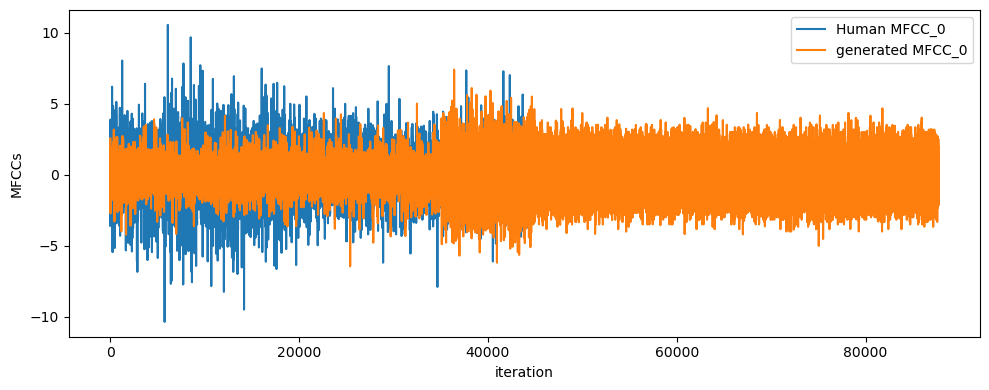

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(generated_mfccs_scaled, label='Human MFCC_0')
plt.plot(human_mfccs_scaled, label='generated MFCC_0')
plt.ylabel('MFCCs')
plt.xlabel('iteration')

plt.legend()
plt.tight_layout()
plt.show()

## Pickling

In [53]:
with open('pickles/df_model.pkl', 'wb') as f:
    pickle.dump(df_model, f)
    
with open('pickles/df_model_nn.pkl', 'wb') as f:
    pickle.dump(df_model_nn, f)